In [58]:
from IPython.display import display, Image

In [59]:
!pip install mglearn

In [60]:
import matplotlib.pyplot as plt
import mglearn

## Titanic

In [61]:
import seaborn as sns
dat = sns.load_dataset("titanic")

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
# from sklearn.datasets import load_dataset("titanic")

In [63]:
sel = ['pclass', 'sibsp', 'parch']
X = dat[sel]
y = dat['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                      stratify=y,
                                                      test_size=0.3,
                                                      random_state=77)

In [64]:
m = DecisionTreeClassifier(max_depth=4, random_state=0)
m.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

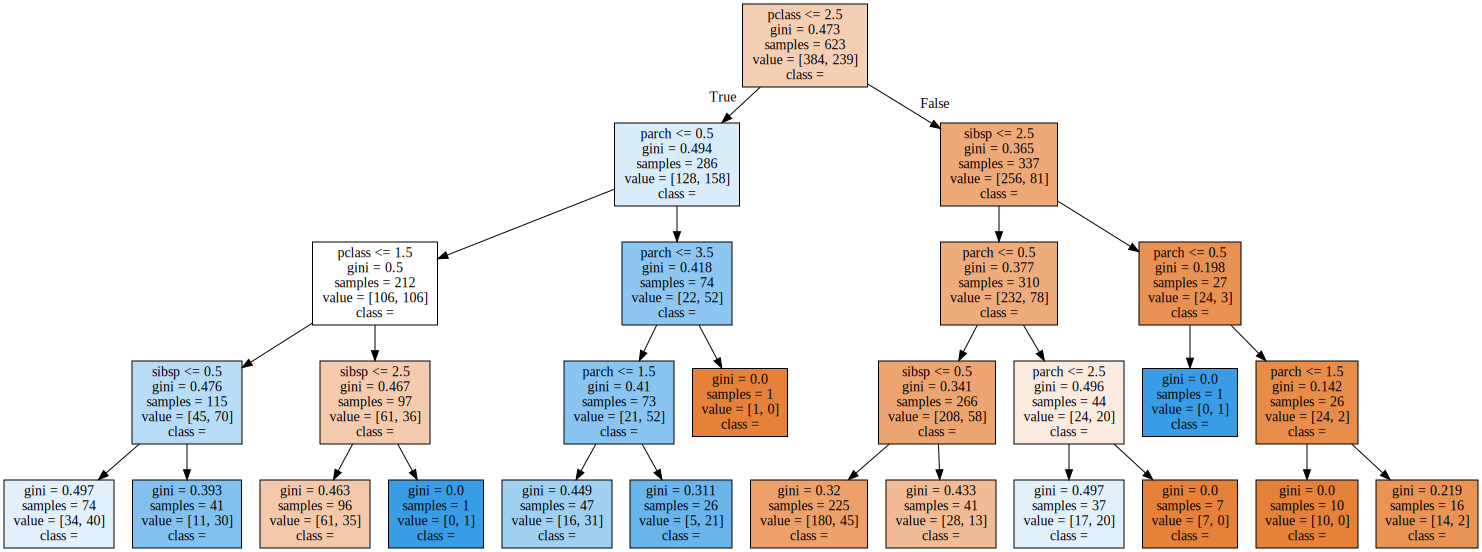

In [65]:
from sklearn.tree import export_graphviz
export_graphviz(m, out_file="tree.dot", 
                class_names=['사망', '생존'],
                feature_names = sel, 
                impurity = True,  # gini 계수
                filled=True)       # color 
import graphviz
with open("tree.dot") as f:
  dot_graph = f.read()
display(graphviz.Source(dot_graph))

## Pima Indians Diabetes 

### 새로운 데이터 불러오기 >> diabetes.csv

In [66]:
import pandas as pd
from sklearn import metrics
# from sklearn.datasets import load_diabetes  라고 해도됨(이 데이터셋의 경우)

In [67]:
pima = pd.read_csv("diabetes.csv")
pima.info()

print("pima.keys() : \n{}".format(pima.keys()))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
pima.keys() : 
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [20]:
from sklearn.model_selection import train_test_split

In [28]:
## 우선 데이터를 다 가져와보자. 
sel = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
X = pima[sel]
y = pima['Outcome']

#데이터 셋 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                         test_size=0.3,    
                                         random_state=1) 



In [29]:
# 실습 모델 만들기

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


In [33]:

model = DecisionTreeClassifier(max_depth=5, random_state=0)   # 의사결정 트리는 0,1,2,3,4 순으로 카운트 함 

model.fit(X_train, y_train)

## max_depth의 숫자를 바꿔가며 정확도를 파악 
print("학습용 세트 정확도 : ", model.score(X_train, y_train))
print("테스트 세트 정확도 : ", model.score(X_test, y_test))

학습용 세트 정확도 :  0.8305400372439479
테스트 세트 정확도 :  0.7575757575757576


### 실습
* max_depth를 변경해 가면서 학습용, 테스트용 점수(정확도) 확인해 보자
* test_size도 추가해서 확인해 보기

In [56]:
depth_nums = range(1,15,1) #시작 값, 끝값, 중간 값
size_nums =range(1, 5, 1)



##size_num을 하나씩 바꿀 때 마다 depth_num이 바뀌는 거니까, depth_num이 들여쓰기임
for num in size_nums: # test_size 변경해 가면서 확인
  X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size =30,
                                                    random_state=77)
  
  for one in depth_nums:   #max_depth를 변경해 가면서 확인
    model = DecisionTreeClassifier(max_depth=1, random_state=0)   # 의사결정 트리는 맨 위부터 0,1,2,3,4 순으로 카운트 함 
    model.fit(X_train, y_train)



    print("size_nums: %.2f, model depth : %d"  % (num/10, one))  #이거 무슨말???
    print("학습용 세트 정확도 : ", model.score(X_train, y_train))
    print("테스트 세트 정확도 : ", model.score(X_test, y_test))


size_nums: 0.10, model depth : 1
학습용 세트 정확도 :  0.7344173441734417
테스트 세트 정확도 :  0.7666666666666667
size_nums: 0.10, model depth : 2
학습용 세트 정확도 :  0.7344173441734417
테스트 세트 정확도 :  0.7666666666666667
size_nums: 0.10, model depth : 3
학습용 세트 정확도 :  0.7344173441734417
테스트 세트 정확도 :  0.7666666666666667
size_nums: 0.10, model depth : 4
학습용 세트 정확도 :  0.7344173441734417
테스트 세트 정확도 :  0.7666666666666667
size_nums: 0.10, model depth : 5
학습용 세트 정확도 :  0.7344173441734417
테스트 세트 정확도 :  0.7666666666666667
size_nums: 0.10, model depth : 6
학습용 세트 정확도 :  0.7344173441734417
테스트 세트 정확도 :  0.7666666666666667
size_nums: 0.10, model depth : 7
학습용 세트 정확도 :  0.7344173441734417
테스트 세트 정확도 :  0.7666666666666667
size_nums: 0.10, model depth : 8
학습용 세트 정확도 :  0.7344173441734417
테스트 세트 정확도 :  0.7666666666666667
size_nums: 0.10, model depth : 9
학습용 세트 정확도 :  0.7344173441734417
테스트 세트 정확도 :  0.7666666666666667
size_nums: 0.10, model depth : 10
학습용 세트 정확도 :  0.7344173441734417
테스트 세트 정확도 :  0.7666666666666667
size_nums

In [54]:
depth_nums = range(1,15,1) #시작 값, 끝값, 중간 값
size_nums =range(1, 5, 1)


##size_num을 하나씩 바꿀 때 마다 depth_num이 바뀌는 거니까, depth_num이 들여쓰기임
for num in size_nums: # test_size 변경해 가면서 확인
  X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size =30,
                                                    random_state=77)
  
  for one in depth_nums:   #max_depth를 변경해 가면서 확인
    model = DecisionTreeClassifier(max_depth=4, random_state=0)   # 의사결정 트리는 맨 위부터 0,1,2,3,4 순으로 카운트 함 
    model.fit(X_train, y_train)
  